In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
dfc = df.copy()
dfc.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
print(dfc.shape)
print(dfc.dtypes)
print(dfc.info())

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
s

In [4]:
sum(dfc.duplicated())

0

Convert member_birth_year data type to integer and start_time & end_time to datetime data type.

In [5]:
dfc = dfc.fillna(0)
dfc['member_birth_year'] = dfc['member_birth_year'].astype(int)

In [6]:
dfc["start_time"] = pd.to_datetime(dfc["start_time"])
dfc["end_time"] = pd.to_datetime(dfc["end_time"])

Split and separate the date and time from the timestamp in start_time and end_time columns. Separate them into new columns (start_date & start_time) and (end_date & end_time). After, drop the original start_time and end_time columns and reposition the newly created columns to take the position of the former columns on the table.

In [7]:
dfc['start_date'] = [d.date() for d in dfc['start_time']]
dfc['start_time'] = [d.time() for d in dfc['start_time']]

second_column = dfc.pop('start_date') #reposition the new start_date column to the 2nd column position on the table
dfc.insert(2, 'start_date', second_column)

third_column = dfc.pop('start_time') #reposition the new start_time column to the 3rd column position on the table
dfc.insert(4, 'start_time', third_column)

dfc['end_date'] = [d.date() for d in dfc['end_time']]
dfc['end_time'] = [d.time() for d in dfc['end_time']]

forth_column = dfc.pop('end_date') #reposition the new end_date column to the 4th column position on the table
dfc.insert(3, 'end_date', forth_column)

fifth_column = dfc.pop('end_time') #reposition the new end_time column to the 5th column position on the table
dfc.insert(5, 'end_time', fifth_column)

sixth_column = dfc.pop('start_station_id') #reposition the new end_time column to the 5th column position on the table
dfc.insert(6, 'start_station_id', sixth_column)

In [8]:
dfc.head()

,duration_sec,start_date,end_date,start_time,end_time,start_station_name,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28,2019-03-01,17:32:10.145000,08:01:55.975000,Montgomery St BART Station (Market St at 2nd St),21.0,37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
1,42521,2019-02-28,2019-03-01,18:53:21.789000,06:42:03.056000,The Embarcadero at Steuart St,23.0,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,0,No
2,61854,2019-02-28,2019-03-01,12:13:13.218000,05:24:08.146000,Market St at Dolores St,86.0,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28,2019-03-01,17:54:26.010000,04:02:36.842000,Grove St at Masonic Ave,375.0,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28,2019-03-01,23:54:18.549000,00:20:44.074000,Frank H Ogawa Plaza,7.0,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes


In [9]:
sum(dfc.member_birth_year.isnull())

0

In [10]:
dfc.shape

(183412, 18)

In [11]:
dfc.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,138.441569,37.771223,-122.352664,136.102780,37.771427,-122.352250,4472.906375,1895.366132
std,1794.389780,111.811012,0.099581,0.117097,111.544544,0.099490,0.116673,1664.383394,411.850439
min,61.000000,0.000000,37.317298,-122.453704,0.000000,37.317298,-122.453704,11.000000,0.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1979.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## What is the distribution of the data?

> There are 183412 trip data in the dataset with originally 16 columns of trip information (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). The dataset comprises of data for customers and subscribers who are either males, females or of other gender identification.

## What are you interested in finding out?

> I am most interested in figuring out what features are best for predicting when most trips are taken, how long the average trip took and the relationship between user type, gender and the trips.

## What variables do you believe will help you in your findings?

> I expect that duration_sec, start_date, user_type and member_gender will have the strongest effect on when trips are taken, the average duration of trips and user type, gender and trip relationship. The duration_sec contains the duration for each trips which will come in handy in analyzing the average trip duration. The start_date contains the date for trips, which is important in understanding when trips are taken. The user_type contains a categorization of the users whether customers or subscribers and member_gender categorizes the users gender.

## How does duration and birth year distribute in the data?

> I will start by looking at the distribution of some variables of interest: duration and birth year.

> How does the trip duration distribute and members who took most trips were born in what year?

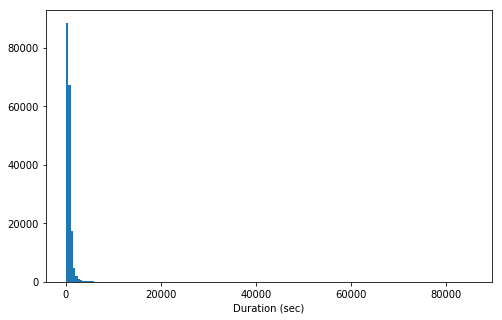

In [12]:
# standard-scaled plot for trip durations
binsize = 500
bins = np.arange(0, dfc['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (sec)')
plt.show()

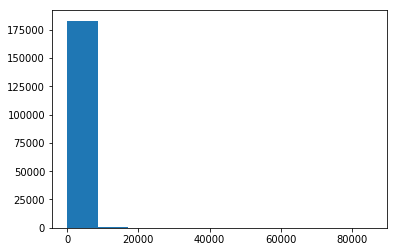

In [13]:
plt.hist(data = dfc , x = "duration_sec");

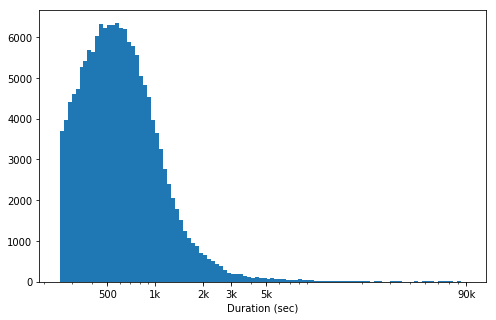

In [14]:
#using a longer scale
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(dfc['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = dfc, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 3e3, 5e3, 9e4], [500, '1k', '2k', '3k', '5k', '90k'])
plt.xlabel('Duration (sec)')
plt.show()

Most trips are short with duration falling under 2000 seconds. The distribution of the trip duration looks somewhat conical with a sharp jump at the start, peak falling rouhgly in between 400secs and 700secs, and gradual fall as the duration extends. Very less trips are noticed from duration of 5000secs and above.

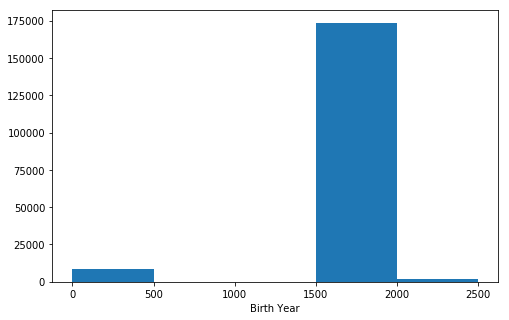

In [15]:
# plotting member_birth_year on a standard scale
binsize = 500
bins = np.arange(0, dfc['member_birth_year'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = dfc, x = 'member_birth_year', bins = bins)
plt.xlabel('Birth Year')
plt.show()

Preliminary visualization of the birth year shows that most of the members are within the year range of 1500 to 2000, followed by year range of 0 to 500 and then 2001 to 2500. Some birth years as shown on the graph are definitely erroneous and may be due to data entry errors and mistakes, such as members of birth year between 0 to 500.

## Are the datas with birth years less than 500 correct?

In [16]:
df0 = dfc[dfc.member_birth_year < 500]
df0

,duration_sec,start_date,end_date,start_time,end_time,start_station_name,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28,2019-03-01,18:53:21.789000,06:42:03.056000,The Embarcadero at Steuart St,23.0,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,0,No
13,915,2019-02-28,2019-03-01,23:49:06.062000,00:04:21.867000,Channing Way at Shattuck Ave,252.0,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,0,0,No
28,650,2019-02-28,2019-02-28,23:43:27.503000,23:54:18.451000,University Ave at Oxford St,258.0,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,0,0,No
53,3418,2019-02-28,2019-02-28,22:41:16.362000,23:38:14.363000,Davis St at Jackson St,11.0,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,0,0,No
65,926,2019-02-28,2019-02-28,23:17:05.853000,23:32:32.682000,Commercial St at Montgomery St,13.0,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,0,0,No
147,372,2019-02-28,2019-02-28,22:46:19.114000,22:52:31.477000,Hyde St at Post St,369.0,37.787349,-122.416651,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2191,Customer,0,0,No
176,730,2019-02-28,2019-02-28,22:28:50.514000,22:41:00.897000,Channing Way at San Pablo Ave,263.0,37.862827,-122.290230,258.0,University Ave at Oxford St,37.872355,-122.266447,4784,Customer,0,0,No
220,1425,2019-02-28,2019-02-28,22:05:25.553000,22:29:11.118000,The Embarcadero at Vallejo St,8.0,37.799953,-122.398525,109.0,17th St at Valencia St,37.763316,-122.421904,6525,Subscriber,0,0,No
266,1302,2019-02-28,2019-02-28,21:53:13.274000,22:14:56.173000,Grand Ave at Webster St,181.0,37.811377,-122.265192,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,2471,Customer,0,0,No
292,1468,2019-02-28,2019-02-28,21:43:04.363000,22:07:32.664000,5th St at Folsom,321.0,37.780146,-122.403071,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,6040,Customer,0,0,No


Since all other data look perfect with exception of some missing birth years and genders, its safe to assume that the missing data were as a result of entry error or omission.

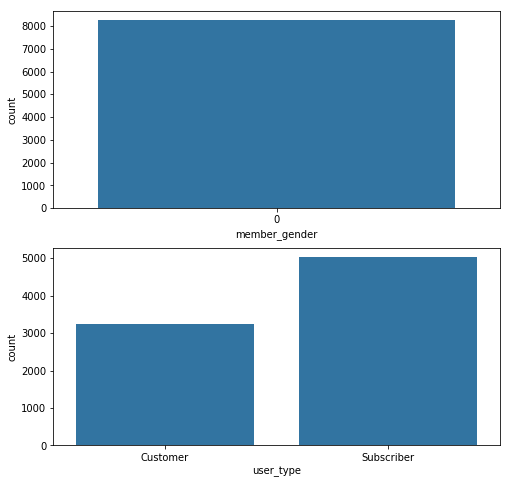

In [17]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = df0, x = 'member_gender', color = default_color, ax = ax[0])
sb.countplot(data = df0, x = 'user_type', color = default_color, ax = ax[1])
plt.show()

The visualization above shows that during data entry, there was error in the gender representation of 8000+ people whose years of birth also erroneously fall under 500. This set of people contain more subscribers (about 5000) and lesser customer (3000+).

## How does the member gender and trip start dates distribute across the trip data?

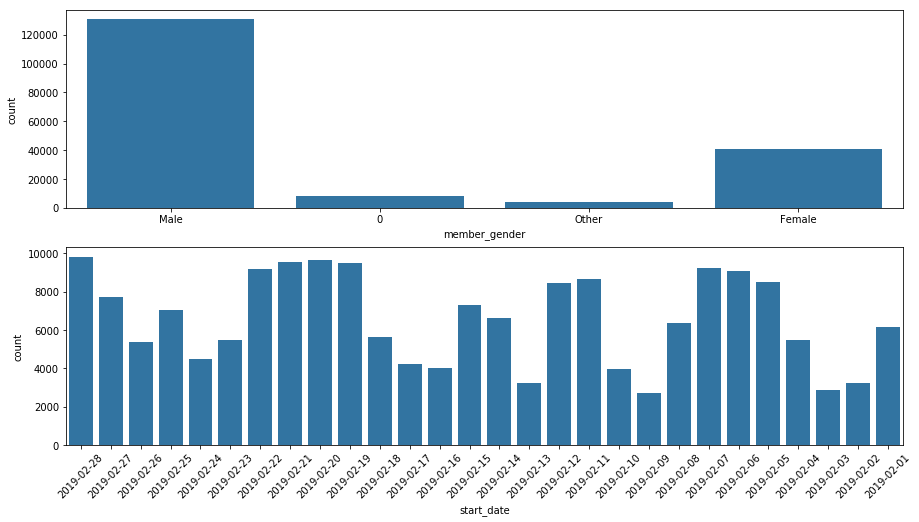

In [18]:
fig, ax = plt.subplots(nrows=2, figsize = [15,8])
default_color = sb.color_palette()[0]
sb.countplot(data = dfc, x = 'member_gender', color = default_color, ax = ax[0])
sb.countplot(data = dfc, x = 'start_date', color = default_color, ax = ax[1])
plt.xticks(rotation=45)
plt.show()

A general look into the data shows that there are far more males who form the majority (120000+), followed by females (40000+), misrepresented genders (less than 10000) and those who identify as others (about 5000). The second visualization showed that less trips were taken on 2nd, 3rd, 9th and 13th, and most trips fell on 28th, 23rd, 22nd, 21st, 20th, 8th and 7th, all of February 2019. 

## What issues were noticed and fixed?

> The user_type and member_gender columns has some entry error with values set at zero. During investigation however, it was noticed that other data parts appear accurate and availabel. This suggests that only those cells were probably omitted, which informs my judgement of leaving them be untouched.


> The timeline was combined, with both dates and times in a column. I however splited the dates from the times to allow for proper investigation into what date the most and least trips were taken. 

## How much trip was taken across user type and gender distribution?

(array([0, 1]), <a list of 2 Text xticklabel objects>)

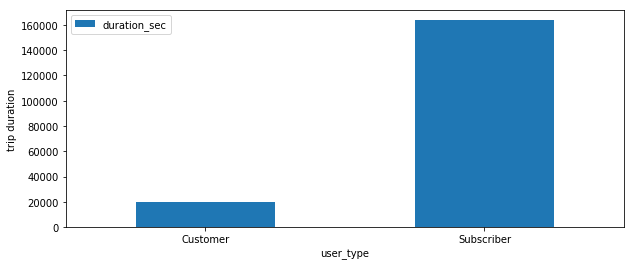

In [19]:
dfc.groupby(['user_type'])[['duration_sec']].count().plot(kind='bar', figsize = [10,4]).set_ylabel('trip duration')
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

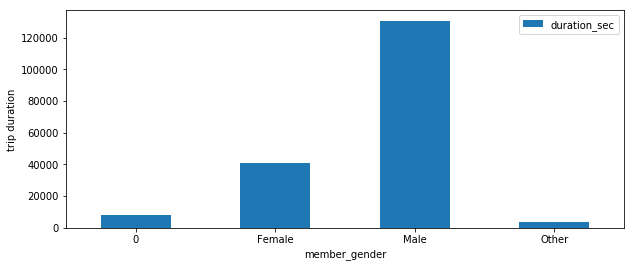

In [20]:
dfc.groupby(['member_gender'])[['duration_sec']].count().plot(kind='bar', figsize = [10,4]).set_ylabel('trip duration')
plt.xticks(rotation=0)

The visualizations above show both the correlation between user_type with trip duration, and member_gender with trip duration. It revealed that subscribers which are mostly males, took the most trips and have the longest trip time.

## What is the relationship between gender and user type, and start date and user type?

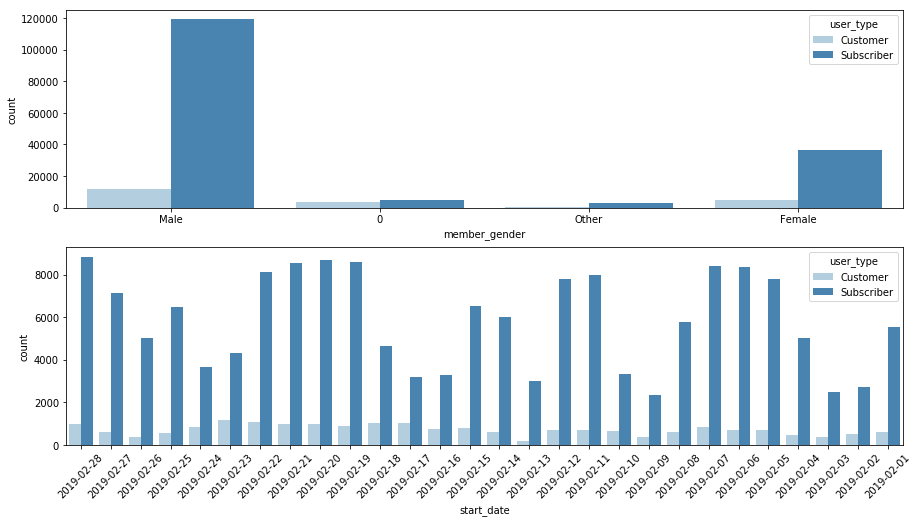

In [21]:
fig, ax = plt.subplots(nrows=2, figsize = [15,8])

sb.countplot(data = dfc, x = 'member_gender', hue = 'user_type', palette = 'Blues', ax = ax[0])
sb.countplot(data = dfc, x = 'start_date', hue = 'user_type', palette = 'Blues', ax = ax[1])
plt.xticks(rotation=45)

plt.show()

Graphs above show that most subscribers are males and likewise, most customers are also males. There was also error entry in the user_type column of both subscribers and customers.

Also, most trips were taken by subscribers on 28th, 22nd, 21st, 20th, 19th, 12th, 11th, 7th, 6th, 5th.

## What is the correlation and relationship between other categorical and numerical variables?

In [22]:
numeric_vars = ['duration_sec', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

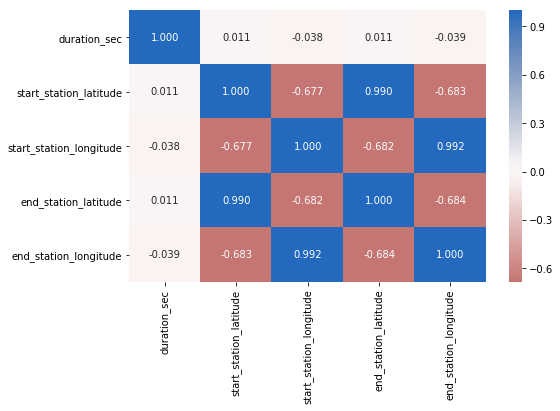

In [23]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(dfc[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

dfc.shape= (183412, 18)
dfc_samp.shape= (500, 18)


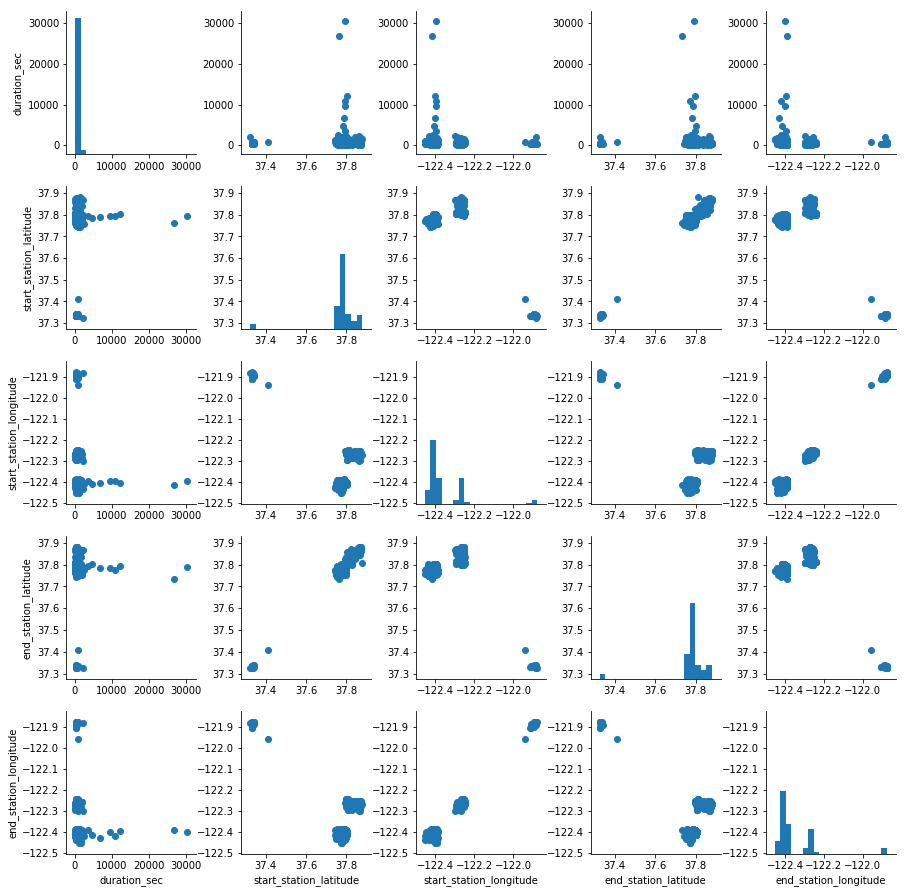

In [24]:
print("dfc.shape=",dfc.shape)
dfc_samp = dfc.sample(n=500, replace = False)
print("dfc_samp.shape=",dfc_samp.shape)

g = sb.PairGrid(data = dfc_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

In [25]:
def label (x, y, t):
    """
    Args:
    x (str): x-axis title
    y (str): y-axis title
    t (str): main title
    
    Returns:
    None
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    
    plt.show()

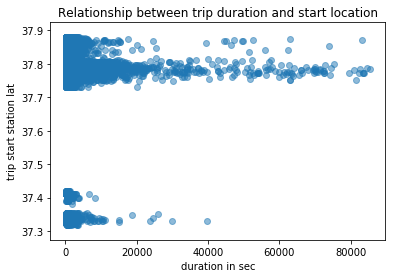

In [26]:
plt.scatter(dfc['duration_sec'], dfc['start_station_latitude'], alpha=0.5)
label("duration in sec", "trip start station lat", "Relationship between trip duration and start location")

> Subscribers who are mostly males, took the most trips and have the longest trip time. Most of the Customers are also males. Graphs above show that most subscribers are males and likewise, most customers are also males. There was also error entry in the user_type column of both subscribers and customers. Also, most trips were taken by subscribers on 28th, 22nd, 21st, 20th, 19th, 12th, 11th, 7th, 6th, 5th.

> Most of the trips were through bike sharing.

## Conclusions
> I downloaded and loaded the fordgobike trip data after which I displayed it. I did a preliminary visual assessment, after which I carried out a mild programmatic assessment.
I converted the member_birth_year data type from float to integer, converted start_time and end_time columns to datetime and then split the time and date in the time stamp into different columns.
The total data was 183412 and had 16 columns. Upon the split and creation of additional columns, the columns increased to 18.
The minimum trip duration in seconds was 61 and maximum 85444, while the average duration was 726.08.
Most of the trips were taken by users whose birth years fell between 1500 and 2000.
Most of the trips fell under 2000 seconds and most of the trips were taken by males who are subscribers.
Most trips were taken by subscribers on 28th, 22nd, 21st, 20th, 19th, 12th, 11th, 7th, 6th and 5th, all of February, 2019.
There were some data entry error as some member birth year and gender were recorded as zero. The data were however left untouched because other column values checked out which suggested that the error was probably as a result of omissions.